<h3><b>Introduction</h3></br>
    
This is a short analysis of the shark attacks in the world. Determining the  Injury (Fatal, Non-Fatal, other) in Non-USA Attacks (by country, region, overall) by binned time of attack

In [3]:
# Import library
import numpy as np
import pandas as pd
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the Dataset
shark_dataset = pd.read_excel('GSAF5-1.xls')

In [4]:
# Quick review Of Data
shark_dataset.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2019.08.27,27-Aug-2019,2019.0,Provoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Donald Walsh,M,...,6.5' shark,"K. McMurray, TrackingSharks.com",2019.08.27-Walsh.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.27,2019.08.27,6452.0,NaN,NaN
1,2019.08.21,21-Aug-2019,2019.0,Unprovoked,USA,Florida,"Fort Lauderdale, Broward County",Wading,Christian Mariani,M,...,NaN,"K. McMurray, TrackingSharks.com",2019.08.21-Mariani.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.21,2019.08.21,6451.0,NaN,NaN
2,2019.08.20,20-Aug-2019,2019.0,Unprovoked,USA,Hawaii,"Napoopoo Park in Kealakekua Bay, The Big Island",Swimming,female,F,...,NaN,"Hawaii News Now, 8/20/2019",2019.08.20-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.20,2019.08.20,6450.0,NaN,NaN
3,2019.08.16,16-Aug-2019,2019.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Wading,Maggie Crum,M,...,NaN,"WESH, 8/16/2019",2019.08.16-Crum.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.16,2019.08.16,6449.0,NaN,NaN
4,2019.08.11,11-Aug-2019,2019.0,Unprovoked,USA,Hawaii,"Makaha Beach, Oahu",Surfing,Max Keliikipi,M,...,10' to 12' shark,"M. Michaelson, GSAF",2019.08.11-Keliikipi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.11,2019.08.11,6448.0,NaN,NaN


<h4><b>Choosing columns for Analysis and cleaning column names</h4></br>

In [5]:
# Checking columns
shark_dataset.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [6]:
# Selecting the columns_dataset
col_to_keep = ["Year","Country","Area","Injury", "Fatal (Y/N)","Time"]
shark_dataset = shark_dataset[col_to_keep]

In [7]:
# Renaming columns names
shark_dataset = shark_dataset.rename(columns={'Fatal (Y/N)': 'Fatal'})

In [8]:
# Selecting latest 20 years data 
shark_dataset = shark_dataset[shark_dataset["Year"] > 1999]

# Changing the type
shark_dataset["Year"] = shark_dataset["Year"].astype("int")

In [9]:
# Checking the change
shark_dataset["Year"].dtype

dtype('int32')

In [10]:
shark_dataset.shape

(2219, 6)

In [11]:
# Taking Data of the non-USA Countries from the dataset.
shark_dataset = shark_dataset[shark_dataset.Country != 'USA']
shark_dataset

,Year,Country,Area,Injury,Fatal,Time
11,2019,AUSTRALIA,Queensland,Lacerations to lower leg,NaN,18h30
16,2019,NEW ZEALAND,Chatham Islands,Shark rammed him but no injury,N,Morning
19,2019,SOUTH AFRICA,Eastern Cape Province,Leg injured,N,10h30
20,2019,AUSTRALIA,Queensland,Puncture wounds to wrist,N,08h00
21,2019,MEXICO,Quinta Roo,Leg injured,N,NaN
22,2019,BAHAMAS,Abaco Islands,Unknown,N,17h30
24,2019,BAHAMAS,Lucayan Archipelago,FATAL,Y,14h00
25,2019,BAHAMAS,Abaco Islands,Lacerations to left calf,N,NaN
26,2019,BAHAMAS,NaN,Injuries to left lower leg,NaN,NaN
30,2019,AUSTRALIA,Tasmania,Bumped by shark but no injury,N,NaN


In [12]:
shark_dataset.shape

(1132, 6)

<h3>Dealing with missing vales</h3>

In [355]:
# Assertion statement to check missing values on Country column
# Returns error if missing values exists
# Returns nothing in case of no missing values
assert shark_dataset.Country.notnull().all()

AssertionError: 

In [356]:
# Finding number of missing values on country coulmn
shark_dataset.Country.isna().sum()

2

In [357]:
# Filling missing values
shark_dataset.Country= shark_dataset.Country.fillna('missing')
assert shark_dataset.Country.notnull().all()

In [358]:
# Finding number of missing values on country coulmn
shark_dataset.Country.isna().sum()

0

<h3>Filling Missing values on the Fatal Column by looking upon Injury</h3></br>


In [13]:
# Filling Fatal column missing values by searching for string 'FATAL' or 'DEATH' in the injury column.

fatalKeys = ['death', 'fatal']

def categorize_fatal(input):

    str_fatal = str(input['Fatal'])
    str_injury = str(input['Injury']).lower()

    if(str_fatal != 'Y' and str_fatal != 'N'):
        if any(x in str_injury for x in fatalKeys): 
            return "Y"
        else:
            return "N"
    else:
        return input['Fatal']

#Function call for categorizing Fatal Attacks
shark_dataset['Fatal'] = shark_dataset.apply(categorize_fatal, axis=1)
shark_dataset.head(100)

,Year,Country,Area,Injury,Fatal,Time
11,2019,AUSTRALIA,Queensland,Lacerations to lower leg,N,18h30
16,2019,NEW ZEALAND,Chatham Islands,Shark rammed him but no injury,N,Morning
19,2019,SOUTH AFRICA,Eastern Cape Province,Leg injured,N,10h30
20,2019,AUSTRALIA,Queensland,Puncture wounds to wrist,N,08h00
21,2019,MEXICO,Quinta Roo,Leg injured,N,NaN
22,2019,BAHAMAS,Abaco Islands,Unknown,N,17h30
24,2019,BAHAMAS,Lucayan Archipelago,FATAL,Y,14h00
25,2019,BAHAMAS,Abaco Islands,Lacerations to left calf,N,NaN
26,2019,BAHAMAS,NaN,Injuries to left lower leg,N,NaN
30,2019,AUSTRALIA,Tasmania,Bumped by shark but no injury,N,NaN


In [14]:
assert shark_dataset.Fatal.notnull().all()

<h3>Cleaning The Time Column</h3>

In [15]:
# bintime code adapted from team 4

def categories(x):
    if "morning" in str(x).lower() or "dawn" in str(x).lower():
        x = str(random.randrange(600,1190,10))
    elif "afternoon" in str(x).lower() or "noon" in str(x).lower() or "am" in str(x).lower() or "a.m." in str(x).lower() or "day" in str(x).lower() or "time" in str(x).lower():
        x = str(random.randrange(1200,1790,10))
    elif "evening" in str(x).lower() or "dusk" in str(x).lower() or "p.m." in str(x).lower() or "sun" in str(x).lower():
        x = str(random.randrange(1800,2390,10))
    elif "night" in str(x).lower():
        x = str(random.randrange(0,590,10))
    x = re.sub('[^0-9]','', str(x))
    if len(x)<4:
        x = "0"+str(x)
    if len(x)>4:
        x = str(x)[:4]
    x = x.replace('h', '')
    return x

# Function call to categorize time into categories
shark_dataset.Time = shark_dataset.Time.apply(categories)


<h3>Binning Time into categories</h3>

In [16]:
# Function to separate time into five discrete segments: Morning, Afternoon, Evening, Night and Early Morning.

def bins(x):
    
    if int(x) >= 800 and int(x) < 1200:
        x = "Morning"
    elif int(x) >= 1200 and int(x) < 1600:
        x = "Afternoon"
    elif int(x) >= 1600 and int(x) < 2000:
        x = "Evening"
    elif (int(x) >= 2000 and int(x) < 2390) or (int(x) >= 0 and int(x) < 400):
        x = "Night"
    elif int(x) >= 400 and int(x)<800:
        x = "Early morning"
    return x
shark_dataset.Time = shark_dataset.Time.apply(bins)
shark_dataset

,Year,Country,Area,Injury,Fatal,Time
11,2019,AUSTRALIA,Queensland,Lacerations to lower leg,N,Evening
16,2019,NEW ZEALAND,Chatham Islands,Shark rammed him but no injury,N,Morning
19,2019,SOUTH AFRICA,Eastern Cape Province,Leg injured,N,Morning
20,2019,AUSTRALIA,Queensland,Puncture wounds to wrist,N,Morning
21,2019,MEXICO,Quinta Roo,Leg injured,N,Night
22,2019,BAHAMAS,Abaco Islands,Unknown,N,Evening
24,2019,BAHAMAS,Lucayan Archipelago,FATAL,Y,Afternoon
25,2019,BAHAMAS,Abaco Islands,Lacerations to left calf,N,Night
26,2019,BAHAMAS,NaN,Injuries to left lower leg,N,Night
30,2019,AUSTRALIA,Tasmania,Bumped by shark but no injury,N,Night


<h3>Adding continent column</h3>

In [17]:
# Adding Continent Column from the country field.

asia = ['Afghanistan',
'Armenia',
'Azerbaijan',
'Bahrain',
'Bangladesh',
'Bhutan',
'Brunei',
'Cambodia',
'China',
'Cyprus',
'East Timor',
'Georgia',
'India',
'Indonesia',
'Iran',
'Iraq',
'Israel',
'Japan',
'Jordan',
'Kazakhstan',
'Kuwait',
'Kyrgyzstan',
'Laos',
'Lebanon',
'Malaysia',
'Maldives',
'Mongolia',
'Myanmar',
'Nepal',
'North Korea',
'Oman',
'Okinawa',
'Pakistan',
'Philippines',
'Qatar',
'Saudi Arabia',
'Singapore',
'South Korea',
'Sri Lanka',
'State of Palestine',
'Syria',
'Taiwan',
'Tajikistan',
'Thailand',
'Turkey',
'Turkmenistan',
'United Arab Emirates',
'Uzbekistan',
'Vietnam',
'Yemen']
europe = ['Albania',
'Andorra',
'Armenia',
'Austria',
'Azerbaijan',
'Belarus',
'Belgium',
'Bosnia and Herzegovina',
'Bulgaria',
'Croatia',
'Cyprus',
'Czech Republic',
'Denmark',
'Estonia',
'England',
'Finland',
'France',
'Georgia',
'Germany',
'Greece',
'Hungary',
'Iceland',
'Ireland',
'Italy',
'Latvia',
'Liechtenstein',
'Lithuania',
'Luxembourg',
'Macedonia',
'Malta',
'Moldova',
'Monaco',
'Montenegro',
'Netherlands',
'Norway',
'Poland',
'Portugal',
'Reunion',
'Romania',
'Russia',
'San Marino',
'Serbia',
'Slovakia',
'Slovenia',
'Scotland',
'Spain',
'Sweden',
'Switzerland',
'Ukraine',
'United Kingdom',
'Vatican City']
africa = ['Algeria',
'Angola',
'Benin',
'Botswana',
'Burkina',
'Burundi',
'Cameroon',
'Cape Verde',
'Central African Republic',
'Chad',
'Comoros',
'Congo',
'Djibouti',
'Egypt',
'Equatorial Guinea',
'Eritrea',
'Ethiopia',
'Gabon',
'Gambia',
'Ghana',
'Guinea',
'Guinea-Bissau',
'Ivory Coast',
'Kenya',
'Lesotho',
'Liberia',
'Libya',
'Madagascar',
'Malawi',
'Mali',
'Mauritania',
'Mauritius',
'Morocco',
'Mozambique',
'Namibia',
'Niger',
'Nigeria',
'Rwanda',
'Sao Tome and Principe',
'Senegal',
'St Helena',
'Seychelles',
'Sierra Leone',
'Somalia',
'South Africa',
'South Sudan',
'Sudan',
'Swaziland',
'Tanzania',
'Togo',
'Tunisia',
'Uganda',
'Zambia',
'Zimbabwe']
oceania = [
'Australia', 'Fiji','Kiribati','Guam',' Tonga','French Polynesia','New Caledonia' ,'Marshall Islands','Micronesia','Nauru' ,'New Zealand' , 'Palau', 'Papua New Guinea' , 'Samoa', 'Solomon Islands', 'Tonga' ,'Tuvalu', 'Vanuatu']
america = ['Argentina',
'Bolivia',
'Brazil',
'Chile',
'Colombia',
'Ecuador',
'Guyana',
'Paraguay',
'Peru',
'Suriname',
'Uruguay',
'Venezuela',
'Antigua and Barbuda',
'Bahamas',
'Barbados',
'Belize',
'Canada',
'Costa Rica',
'Cuba',
'Dominica',
'Dominican Republic',
'El Salvador',
'Grenada',
'Guatemala',
'Haiti',
'Honduras',
'Jamaica',
'Mexico',
'Nicaragua',
'Panama',
'Saint Kitts and Nevis',
'Saint Lucia',
'St. Maarten',
'Grand Cayman',
'Saint Vincent and the Grenadines',
'Trinidad & Tobago',
'Turks & Caicos',
'USA']
australia = ['Australia']

Asia = [x.upper() for x in asia]
Europe = [x.upper() for x in europe]
Africa = [x.upper() for x in africa]
Australia = [x.upper() for x in australia]
America = [x.upper() for x in america]

def get_continent(country):
    if country in Asia:
        return "Asia"
    elif country in Europe:
        return "Europe"
    elif country in Africa:
        return "Africa"
    elif country in Australia:
        return "Australia"
    elif country in America:
        return "America"

shark_dataset['Continent'] = shark_dataset['Country'].apply(lambda x: get_continent(x))
shark_dataset

,Year,Country,Area,Injury,Fatal,Time,Continent
11,2019,AUSTRALIA,Queensland,Lacerations to lower leg,N,Evening,Australia
16,2019,NEW ZEALAND,Chatham Islands,Shark rammed him but no injury,N,Morning,None
19,2019,SOUTH AFRICA,Eastern Cape Province,Leg injured,N,Morning,Africa
20,2019,AUSTRALIA,Queensland,Puncture wounds to wrist,N,Morning,Australia
21,2019,MEXICO,Quinta Roo,Leg injured,N,Night,America
22,2019,BAHAMAS,Abaco Islands,Unknown,N,Evening,America
24,2019,BAHAMAS,Lucayan Archipelago,FATAL,Y,Afternoon,America
25,2019,BAHAMAS,Abaco Islands,Lacerations to left calf,N,Night,America
26,2019,BAHAMAS,NaN,Injuries to left lower leg,N,Night,America
30,2019,AUSTRALIA,Tasmania,Bumped by shark but no injury,N,Night,Australia


<font color='green'><h2>Analysing The Data</h2></font><br>

### Attack By Year

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Year')]

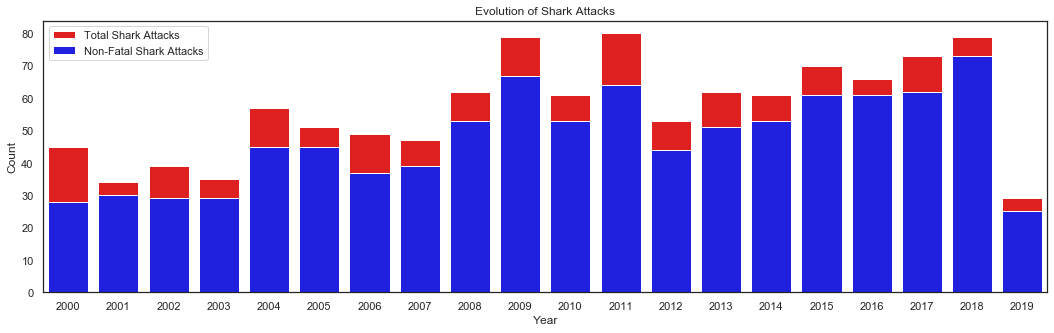

In [24]:
# evolution of shark attacks comparnig year by year.

sns.set(style="white")
sns.color_palette("deep")
sns.set_color_codes("deep")

fig, ax = plt.subplots(figsize=(18, 5))
plt.title("Evolution of Shark Attacks")

sns.countplot(x="Year", data=shark_dataset, label="Total Shark Attacks", color="red")
sns.countplot(x="Year", data=shark_dataset[(shark_dataset["Fatal"] == "N")], 
                  label="Non-Fatal Shark Attacks", color="blue")

ax.legend()
ax.set(ylabel="Count", xlabel="Year")

#### As per the graph its clearly indicated that most of the attackes has been happened in the year 2009 and 2011.

Text(0.5, 1.0, 'Total Number of Fatal and Non-Fatal Attacks')

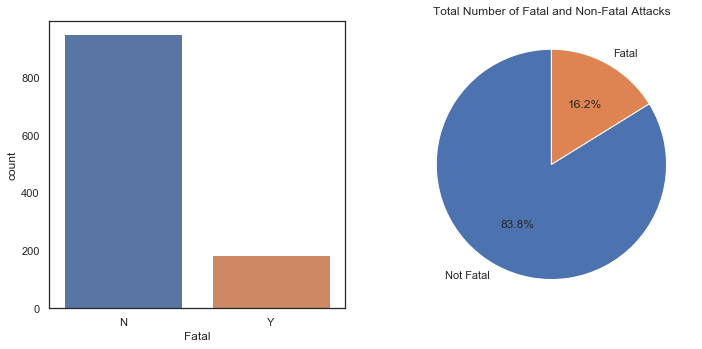

In [23]:
labels = ['Not Fatal', 'Fatal']

fig = plt.figure(figsize=(18, 18))

ax1 = plt.subplot2grid((3,3), (0,0), colspan=1)
sns.countplot(x='Fatal', data = shark_dataset)

ax2 = plt.subplot2grid((3,3), (0,1), colspan=1)
plt.pie(shark_dataset['Fatal'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Total Number of Fatal and Non-Fatal Attacks')

#### As per the graph its clearly visible that most of the attacked were of non fatal kind. There were total 84% of the attacks were non fatal where as only 16% were the fatal. 

In [366]:
print(shark_dataset.Country.value_counts())

AUSTRALIA                  422
SOUTH AFRICA               141
BAHAMAS                     65
BRAZIL                      58
NEW ZEALAND                 48
REUNION                     31
MEXICO                      29
NEW CALEDONIA               28
EGYPT                       24
FRENCH POLYNESIA            18
SPAIN                       16
FIJI                        13
PHILIPPINES                 10
VIETNAM                     10
PAPUA NEW GUINEA             9
COSTA RICA                   8
ECUADOR                      7
JAPAN                        7
INDONESIA                    7
MOZAMBIQUE                   6
CUBA                         6
UNITED KINGDOM               6
THAILAND                     6
SOLOMON ISLANDS              5
TANZANIA                     5
TURKS & CAICOS               5
ITALY                        5
RUSSIA                       4
MALAYSIA                     4
JAMAICA                      4
                          ... 
URUGUAY                      1
NEVIS   

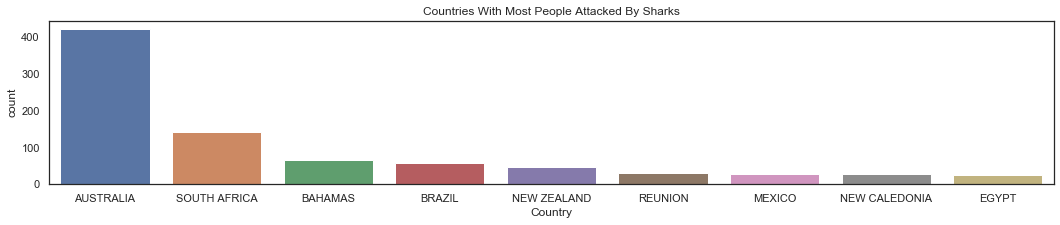

In [378]:
plt.style.use('seaborn-white')
sns.set(style="white")
sns.color_palette("deep")
sns.set_color_codes("deep")

plt.figure(figsize=(18, 3))
plt.title('Countries With Most People Attacked By Sharks')

sns.countplot(x="Country", data=shark_dataset, palette="deep", order=shark_dataset.Country.value_counts().iloc[:9].index)

#### As per the graph its clearly indicated that most of the attacked has been happened in the Australia.  

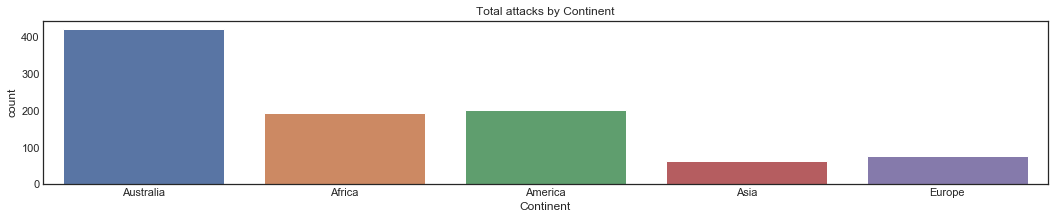

In [383]:
plt.style.use('seaborn-white')
# sns.set(style="white")
# sns.color_palette("deep")
# sns.set_color_codes("deep")

fig = plt.figure(figsize=(18, 3))
plt.title('Total attacks by Continent')

g4 = sns.countplot(x="Continent", data=shark_dataset, palette="deep")

#### As per the graph its clearly indicated that most of the attacked has been happened in the Australia.  

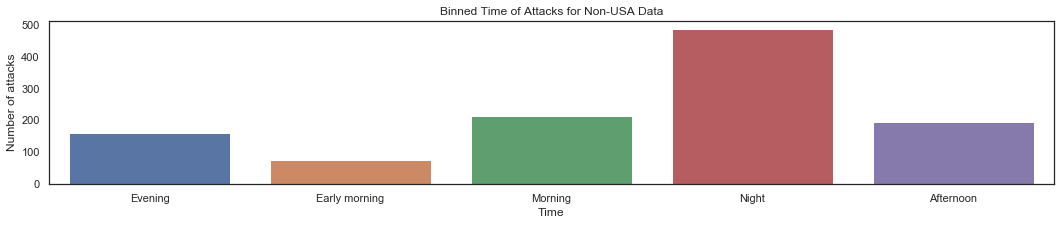

In [392]:
plt.figure(figsize=(18, 3))
sns.countplot(x='Time',data=shark_dataset).set_title('Binned Time of Attacks for Non-USA Data')
plt.xlabel('Time')
plt.ylabel('Number of attacks')
plt.style.use(('ggplot'))

Text(0.5, 0, 'Number of Deaths')

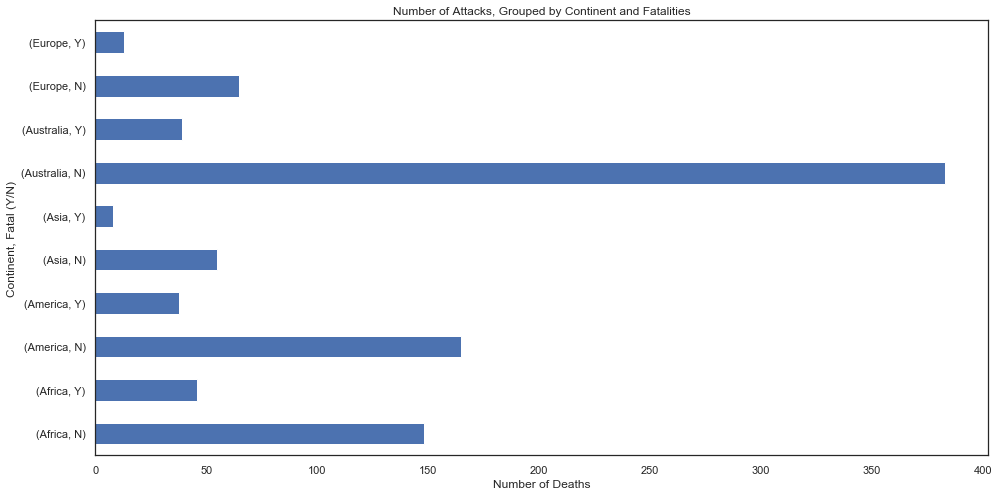

In [411]:
#Plotting the number of attacks grouped by Continent and Fatalities
plt.figure(figsize=(16, 8))
shark_dataset.groupby(['Continent', 'Fatal']).count()['Year'].plot(kind='barh',title='Number of Attacks, Grouped by Continent and Fatalities')
plt.ylabel('Continent, Fatal (Y/N)')
plt.xlabel('Number of Deaths')

#### As per the graph, most injuries has been done by the non fatal attack.

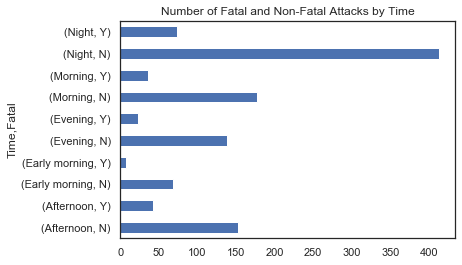

In [409]:
# horizontal bar chart for number of fatal and non-fatal attacks count with respect to time.

shark_dataset.groupby(['Time', 'Fatal']).count()['Country'].plot(kind='barh',title='Number of Fatal and Non-Fatal Attacks by Time')

#### As per the graph, most of the attacks were happened at the night and afternoon time respectively and they were non fatal attacks. 

### Conclusion- Most of the attacks were happened at the night time(8 pm to 4 am) and most of them were the Fatal Attacks.   In the Country Australia the maximum number of shark attacks has been recorded.